#**Used Motorbike Price Prediction**

Tujuan dari portofolio ini adalah melakukan prediksi harga motor bekas Honda di tahun 2016, menggunakan metode Linier Regresi. 

#**Background**



Dataset ini adalah data stock unit dari konsumen gagal bayar. Dan pada akhirnya unit-unit ini akan di distribusi untuk mengurangi kerugian perusahaan.

Untuk itu, saya mencoba untuk memprediksi harga jual motor bekas khususnya merk Honda di rentang waktu tertentu, dalam hal ini dengan dataset di tahun 2016.

Selain untuk perusahaan yang bersangkutan, portofolio ini juga berguna untuk pelaku usaha motor bekas, terutama untuk pelaku yang baru akan buka.

#**Import Libraries**

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!pip install shap
!pip install scikit-plot
!pip install dalex -U
!pip install scipy
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 26.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 30.8 MB/s 
     |████████████████████████████

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xlrd
import scikitplot as skplt
import os
import math
import plotly.express as px
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import warnings
warnings.filterwarnings(action="ignore")
import dalex as dx
import shap

from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import metrics
from IPython.display import display
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from decimal import Decimal
from shap import TreeExplainer
from shap import summary_plot


#**Import Datasets & General Information**

saya melakukan import dataset Used Price Honda 2016. Dan dilakukan beberapa data sample untuk sedikit mereview bagaimana 'bentuk' dan isi dari dataset yang ada.

In [ ]:
df = pd.read_excel('USED_PRICE_HONDA_2016.xlsx')

**Data Sample**

In [ ]:
# sample 5 rows of the data
df.sample(5)

,BRAND MODEL TYPE,CATEGORY,GROUP MODEL TYPE,MODEL,TYPE,YEAR,DOCUMENT,CHASIS NUMBER,CODE ENGINE,LOST PART,CONDITION GRADE,NEW PRICE,SOLD PRICE MINIMUM,MARKET PRICE,SOLD PRICE
1926,HONDA BEAT CW FI MMC,SCOOTER,BEAT FI,BEATCWFIMMC,ACH1M21B04A A/T,2014,Y,MH1JFM212EK268473,JFM2E,1090250,B,14770000,8859750,10750000,8350000
440,HONDA REVO NEW ABSOLUTE CW,CUB,REVO 110,REVONEWABSCW,NF11B2C1,2012,N,MH1JBE318CK198636,JBE3E,1205000,C,14320000,5545000,7750000,4200000
472,HONDA BLADE NEW 110 REPSOL,CUB,BLADE 110 NEW,BLADENEWREPSO,NF11C1CA/M/T,2012,Y,MH1JBH117CK212627,JBH1E,1207650,B,10750000,7242350,9250000,6200000
2897,HONDA CB150R STREETFIRE MMC,SPORT,CB 150,CB150R,CB15A1RRF1 M/T,2015,N,MH1KC411XFK382088,KC41E,2574000,D,24810000,15426000,19000000,14750000
1540,HONDA BEAT ALL NEW FI SW,SCOOTER,BEAT FI,BEATFISW,NC 11BF1D A/T,2014,N,MH1JFD117EK080159,JFD1E,1163250,B,13810000,8286750,10250000,7600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BRAND MODEL TYPE    3204 non-null   object
 1   CATEGORY            3204 non-null   object
 2   GROUP MODEL TYPE    3204 non-null   object
 3   MODEL               3204 non-null   object
 4   TYPE                3204 non-null   object
 5   YEAR                3204 non-null   int64 
 6   DOCUMENT            3204 non-null   object
 7   CHASIS NUMBER       3204 non-null   object
 8   CODE ENGINE         3204 non-null   object
 9   LOST PART           3204 non-null   int64 
 10  CONDITION GRADE     3204 non-null   object
 11  NEW PRICE           3204 non-null   int64 
 12  SOLD PRICE MINIMUM  3204 non-null   int64 
 13  MARKET PRICE        3204 non-null   int64 
 14  SOLD PRICE          3204 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 375.6+ KB


In [ ]:
df.shape


(3204, 15)

bentuk awal dari dataset ini ada 3204 rows dan 15 kolom.

#**Data Cleaning**

Setelah mereview sekilas dataset diawal, bagian selanjutnya yang cukup penting untuk di observasi diawal adalah proses data cleaning yang didalamnya mencari missing value, mencari duplicate rows & columns, jika terdapat missing value & duplicate, akan dilakukan treatment seperlunya pada dataset.

##**Missing Values**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

BRAND MODEL TYPE      0
CATEGORY              0
GROUP MODEL TYPE      0
MODEL                 0
TYPE                  0
YEAR                  0
DOCUMENT              0
CHASIS NUMBER         0
CODE ENGINE           0
LOST PART             0
CONDITION GRADE       0
NEW PRICE             0
SOLD PRICE MINIMUM    0
MARKET PRICE          0
SOLD PRICE            0
dtype: int64

Sekilas tidak terlihat adanya missing value pada dataset ini.


##**Duplicate Rows**

In [ ]:
df.duplicated().sum()

0

setelah dicek tidak terdeteksi adanya duplicated rows

#**Statistical Summary & Data Understanding**

pada bagian ini saya akan mengelompokkan kolom berdasarkan jenis datanya menjadi data categoricals & data numericals. tujuannya untuk mempermudah proses pada saat mereview statistik summary dan proses analisis selanjutnya.

In [ ]:
categoricals = ['BRAND MODEL TYPE','CATEGORY','GROUP MODEL TYPE','MODEL','TYPE','DOCUMENT','CHASIS NUMBER', 'CODE ENGINE', 'CONDITION GRADE']

numericals = ['YEAR','LOST PART', 'NEW PRICE', 'SOLD PRICE MINIMUM', 'MARKET PRICE', 'SOLD PRICE']

##**data numerik :**

In [ ]:
df[numericals].describe()

,YEAR,LOST PART,NEW PRICE,SOLD PRICE MINIMUM,MARKET PRICE,SOLD PRICE
count,3204.000000,3.204000e+03,3.204000e+03,3.204000e+03,3.204000e+03,3.204000e+03
mean,2013.969101,1.318897e+06,1.559307e+07,9.338050e+06,1.119671e+07,7.780294e+06
std,2.024664,1.014883e+06,3.536274e+06,3.169772e+06,2.775933e+06,3.117158e+06
min,2002.000000,0.000000e+00,5.000000e+06,1.500000e+06,2.500000e+06,8.000000e+05
25%,2013.000000,6.885625e+05,1.378000e+07,7.541875e+06,9.500000e+06,5.800000e+06
50%,2015.000000,1.141375e+06,1.532000e+07,9.551625e+06,1.125000e+07,7.900000e+06
75%,2015.000000,1.703325e+06,1.722500e+07,1.115000e+07,1.250000e+07,9.650000e+06
max,2016.000000,1.302850e+07,4.692000e+07,3.082875e+07,3.400000e+07,2.420000e+07


Observation:
1. kolom YEAR menjelaskan tahun motor tersebut di produksi.
2. kolom LOST PART menjelaskan kondisi motor dihitung berdasarkan harga spare part yang harus diganti / diperbaiki.
3. kolom NEW PRICE menjelaskan harga baru motor tersebut dijual dalam kondisi baru pada saat tahun motor ini diprduksi.
4. kolom SOLD PRICE MINIMUM menjelaskan harga jual minimum yang ditetapkan perusahaan. dan setiap unit memiliki nilai yang berbeda. nilai ini didapat dari MARKET PRICE dikurangi LOST PART.
5. kolom MARKET PRICE menjelaskan harga pasar motor bekas yang ditetapkan perusahaan. nilai dari market price ini ditetapkan berdasarkan model, tipe, tahun dan lokasi dari wilayah tertentu.
6. kolom SOLD PRICE menjelaskan harga real motor tersebut terjual dalam kondisi bekas. setiap unit memiliki SOLD PRICE yang berbeda-beda tergantung dari kondisi unit tersebut. 

##**data kategorik :**

In [ ]:
df[categoricals].describe()

,BRAND MODEL TYPE,CATEGORY,GROUP MODEL TYPE,MODEL,TYPE,DOCUMENT,CHASIS NUMBER,CODE ENGINE,CONDITION GRADE
count,3204,3204,3204,3204,3204,3204,3204,3204,3204
unique,100,5,40,136,139,2,3188,95,4
top,HONDA REVO FIT FI,SCOOTER,REVO FI,REVO FIT FI,X1B02N04L0 AT,Y,MH1JFB127EK236665,JBK1E,A
freq,321,1776,404,321,263,1747,2,321,1243


Observations:
1. kolom BRAND MODEL TYPE menjelaskan nama merek model dan tipe secara lengkap. di kolom ini terdapat 100 unique value yang berbeda.
2. kolom CATEGORY merupakan jenis motor dibedakan berdasarkan bentuk. dalam hal ini terdapat 5 unique value. 
3. kolom GROUP MODEL TYPE merupakan grouping model dan tipe model yang ada di dataset. ada 40 macam group model.
4. kolom MODEL menjelaskan model dari motor tertentu. ada 136 model yang berbeda.
5. kolom TYPE menjelaskan tipe dari motor tertentu. ada 139 tipe yang berbeda.
6. kolom DOCUMENT merupakan ada atau tidaknya STNK pada stok di data perusahaan. kolom ini memiliki tipe data boolean Value Y-N (Yes-No).
7. kolom CHASIS NUMBER menjelaskan identifikasi motor yang terdaftar di dokumen kendaraan. sehingga setiap motor memiliki CHASIS NUMBER yang berbeda. jika ada chasis number yang sama pada data ini, kemungkinan besar unit tersebut pernah masuk ke warehouse perusahaan lebih dari 1 kali.
8. kolom CODE ENGINE menjelaskan kode mesin tertentu. biasanya kode engine ini bisa menentukan model dan tipe motor tertentu.
9. kolom CONDITION GRADE merupakan kondisi real motor bekas tersebut pada saat motor terjual. kolom ini memiliki value A,B,C,D dengan kondisi paling baik ada di grade A, kondisi paling buruk ada di grade D.

#**Handle Outlier**

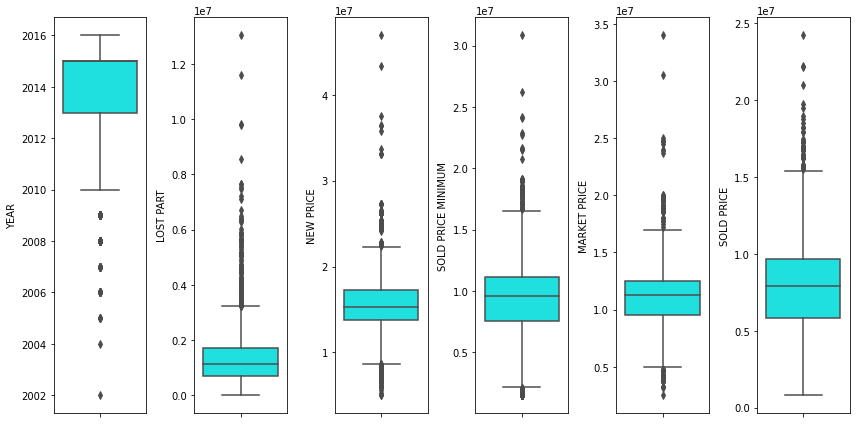

In [ ]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

melihat dari data diatas, saya tidak akan mereduksi outlier-outlier ini karena saya kira datanya masih masuk akal. Karena memang ada beberapa tipe yang ada di segmen menengah-atas yang jumlah unitnya memang sedikit di dataset aslinya. sedangkan data mayoritas ada di unit revo, beat, supra, vario yang jenis-jenis motor tersebut ada di segmen menengah-bawah.

#**Distribution Form**

##**Numerical Columns**

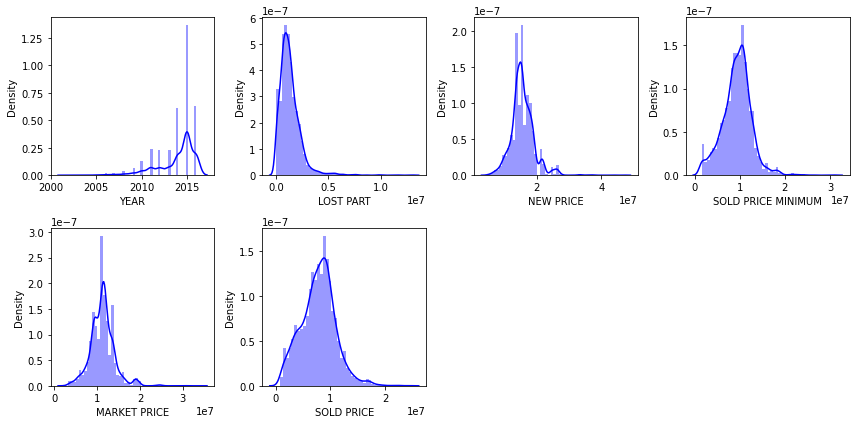

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. kolom YEAR memiliki distribusi negatively skew. secara distribusi lebih banyak di tahun 2014-2016.
2. kolom LOST PART memiliki pola distribusi positively skew. kemungkinan besar berada pada sebaran unit yang memiliki CONDITION GRADE A & B.
3. kolom NEW PRICE memiliki distribusi multinom / distribusi lebih dari dua puncak. sebaran datanya terlihat sebagian besar ada di unit yang memiliki harga jual baru di bawah 20 juta (segmen motor low-medium). dan sebagian kecil diantara 20-30 juta (segmen medium-high), dan beberapa unit diatas 30juta (segmen high).
4. kolom SOLD PRICE MINIMUM memiliki pola distribusi hampir seimbang. dengan mayoritas data ada di harga sekitar 10 jutaan.
5. kolom MARKET PRICE memiliki pola distribusi multinom. hampir senada dengan kolom NEW PRICE.
6. kolom SOLD PRICE memiliki distribusi cenderung negatively skew. datanya tersebar di harga 1 jutaan sampai hampir di 20 juta. dan persebaran datanya sangat mirip dengan kolom SOLD PRICE MINIMUM.



##**Categorical Columns**

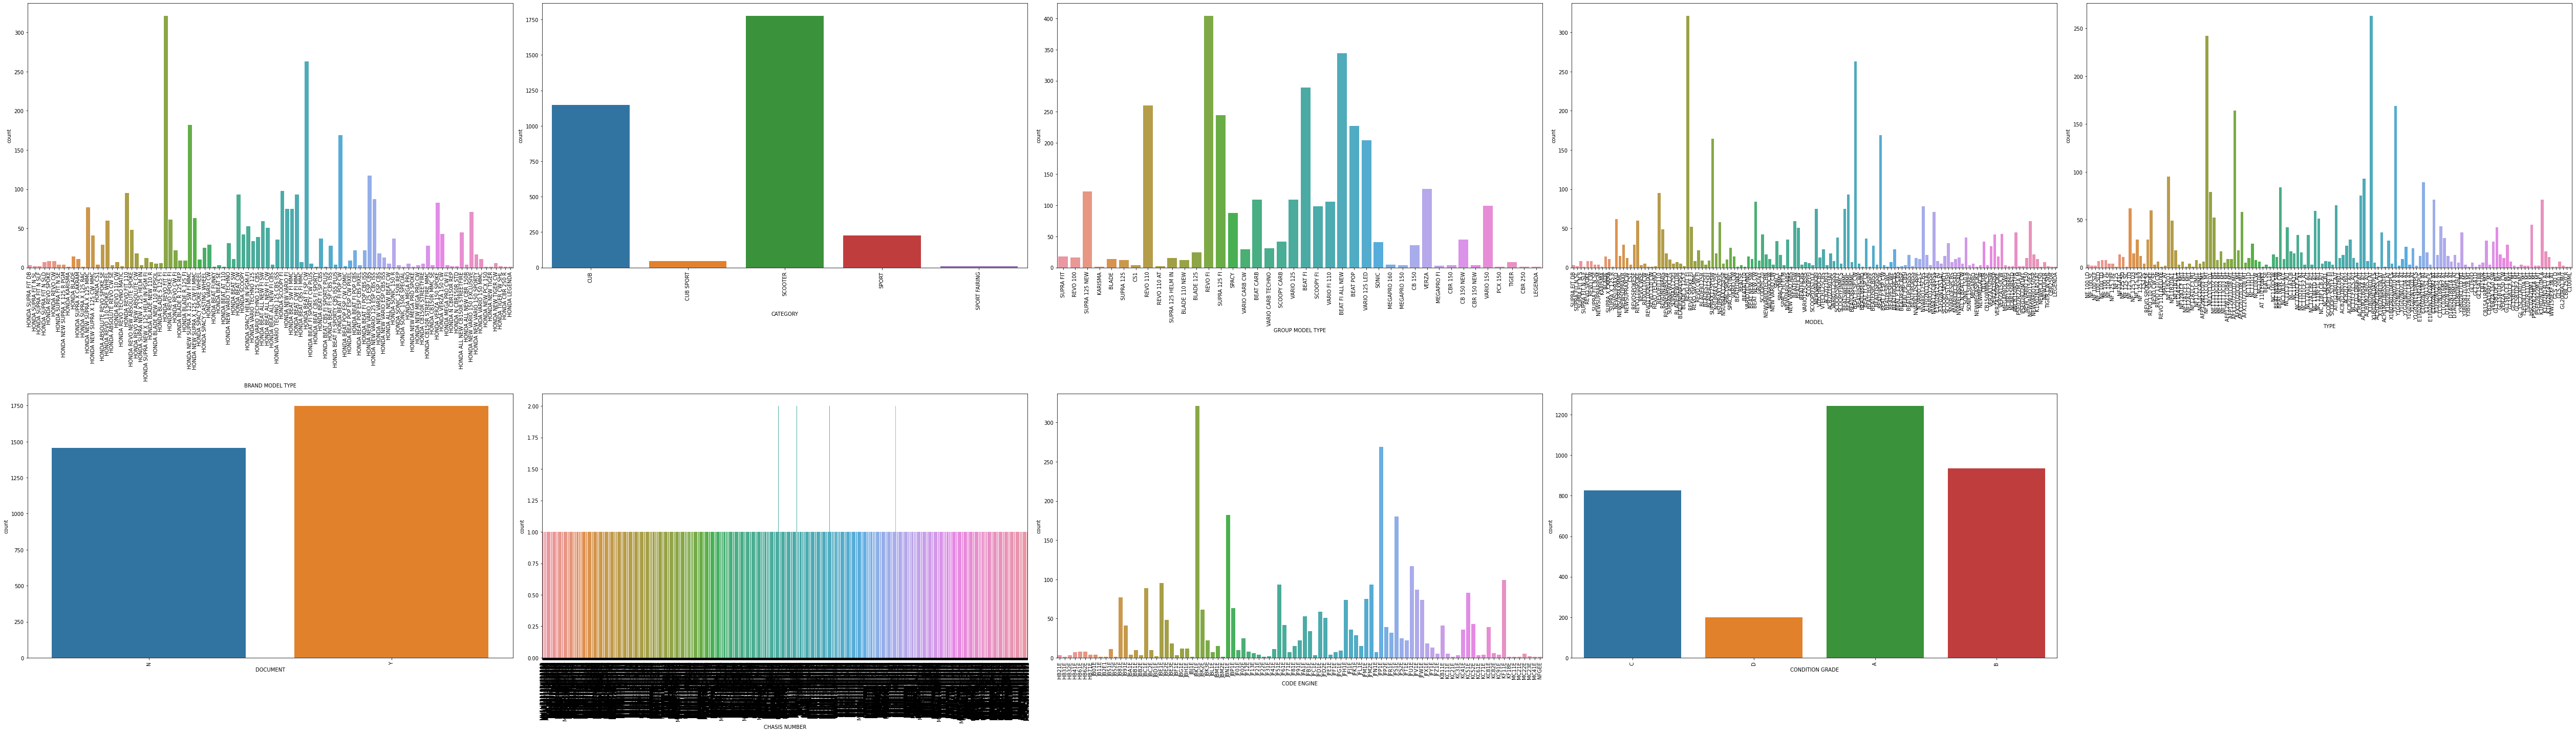

In [ ]:
# Count Plot

plt.figure(figsize=(70,20))

features = categoricals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()
    plt.xticks(rotation=90)

Observation:
1. kolom BRAND MODEL TYPE memiliki distribusi paling banyak di HONDA REVO FIT FI, HONDA BEAT FI SP CW, HONDA NEW SUPRA X 125 SW FI MMC, dan HONDA BEAT POP FI CW.
2. kolom CATEGORY memiliki 5 unique value, dengan 2 distribusi terbanyak ada di SCOOTER & CUB
3. kolom GROUP MODEL TYPE memiliki distribusi 3 terbanyak ada di REVO FI, BEAT FI ALL NEW dan BEAT FI.
4. kolom MODEL, TYPE dan CODE ENGINE memiliki distribusi senada dengan kolom BRAND MODEL TYPE.
5. kolom DOCUMENT hanya memiliki sebaran terbanyak ada di STNK Y (yes / ada) walaupun perbedaannya tidak begitu signifikan.
6. kolom CONDITION GRADE memiliki 4 unique value (A,B,C,D), dengan distribusi terbanyak ada di grade A dan B.

#**EDA & Visualisation**

Dibagian ini akan saya visualisasikan hubungan antar fitur kepada fitur targetnya.

##**CATEGORY, GROUP MODEL TYPE, BRAND MODEL TYPE, MODEL, TYPE, CODE ENGINE**

In [ ]:
df.groupby(['CATEGORY','GROUP MODEL TYPE','BRAND MODEL TYPE','MODEL','TYPE','CODE ENGINE']).agg(
    count_VIN = ('CHASIS NUMBER', 'count'),
    )

count_VIN
CATEGORY      GROUP MODEL TYPE BRAND MODEL TYPE           MODEL         TYPE           CODE ENGINE           
CUB           BLADE            HONDA BLADE                BLADE         NF11A1C        JB2E1                1
                                                                                       JBB1E               10
                                                                                       JBB2E                3
              BLADE 110 NEW    HONDA BLADE NEW 110 R      BLADENEW110R  NF11C1C/M/T    JBH1E                7
                               HONDA BLADE NEW 110 REPSOL BLADENEWREPSO NF11C1C/M/T    JBH1E                1
...                                                                                                       ...
SPORT FAIRING CBR 150          HONDA N CBR150R REP        NCBR150RREP   T5E02R11L0A MT KC71E                2
                               HONDA N CBR150R STD        NCBR150RSTD   T5E02R11L0 MT  KC71E                2
              CBR 150 NEW      HONDA ALL NEW CBR 150R     P5E02R22M1A M P5E02R22M1A MT KC91E                2
                                                          P5E02R22M1MT  P5E02R22M1 MT  KC91E                2
              CBR 250          HONDA CBR 250 R            CBR250R       CBR 250 R      MC41E                1

[172 rows x 1 columns]

Bagian group by ini saya ingin menjelaskan bahwa fitur CATEGORY, BRAND MODEL TYPE, MODEL, TYPE, CODE ENGINE sudah terwakili oleh fitur GROUP MODEL TYPE, sehingga dibagian selanjutnya, fitur CATEGORY, BRAND MODEL TYPE, MODEL, TYPE, CODE ENGINE akan saya drop.

kenapa bisa ada kolom-kolom yang banyak untuk 1 jenis motor? jadi, BRAND MODEL TYPE adalah nama motor yang biasa orang tahu. sedangkan kolom MODEL dan TYPE adalah nama yang tercantum di sistim perusahaan, dan biasanya beda warna, stripe, dan asesoris memiliki kode / nama yang berbeda sedikit walaupun masih dalam satu model. 
dan kolom ENGINE CODE adalah kode mesin yang tercetak di blok mesin kendaraan. dan kode mesin ini biasanya menjadi penentu model utama dan type kendaraan.

##**DOCUMENT & CONDITION GRADE vs SOLD PRICE**

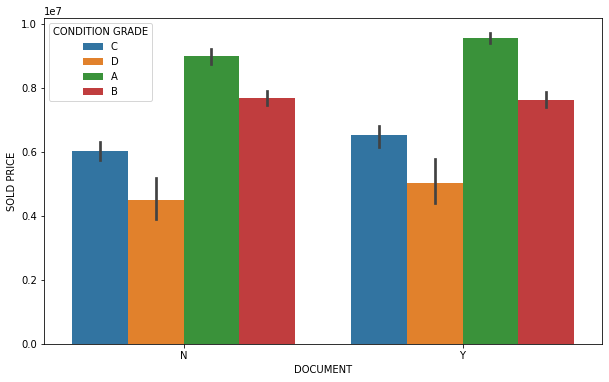

In [ ]:
sns.barplot(
    data = df,
    y="SOLD PRICE",
    x="DOCUMENT",
    hue="CONDITION GRADE"    
    )

In [ ]:
df.groupby(['DOCUMENT','CONDITION GRADE']).agg(
    count_VIN = ('CHASIS NUMBER', 'count'),
    avg_SoldPrice = ('SOLD PRICE', 'mean')
    )

count_VIN  avg_SoldPrice
DOCUMENT CONDITION GRADE                          
N        A                      310   8.994342e+06
         B                      518   7.670003e+06
         C                      510   6.025061e+06
         D                      119   4.496034e+06
Y        A                      933   9.553122e+06
         B                      418   7.622947e+06
         C                      316   6.514668e+06
         D                       80   5.010688e+06

secara rata-rata harga SOLD PRICE, DOCUMENT dengan STNK Y memiliki angka yang lebih tinggi walaupun perbedaan average SOLD PRICE tidak terlalu signifikan. baik itu di CONDITION GRADE A,B,C,D.

##**GROUP MODEL TYPE vs SOLD PRICE**

berikut adalah gambaran sebaran SOLD PRICE di setiap jenis motornya berdasarkan GROUP MODEL TYPE

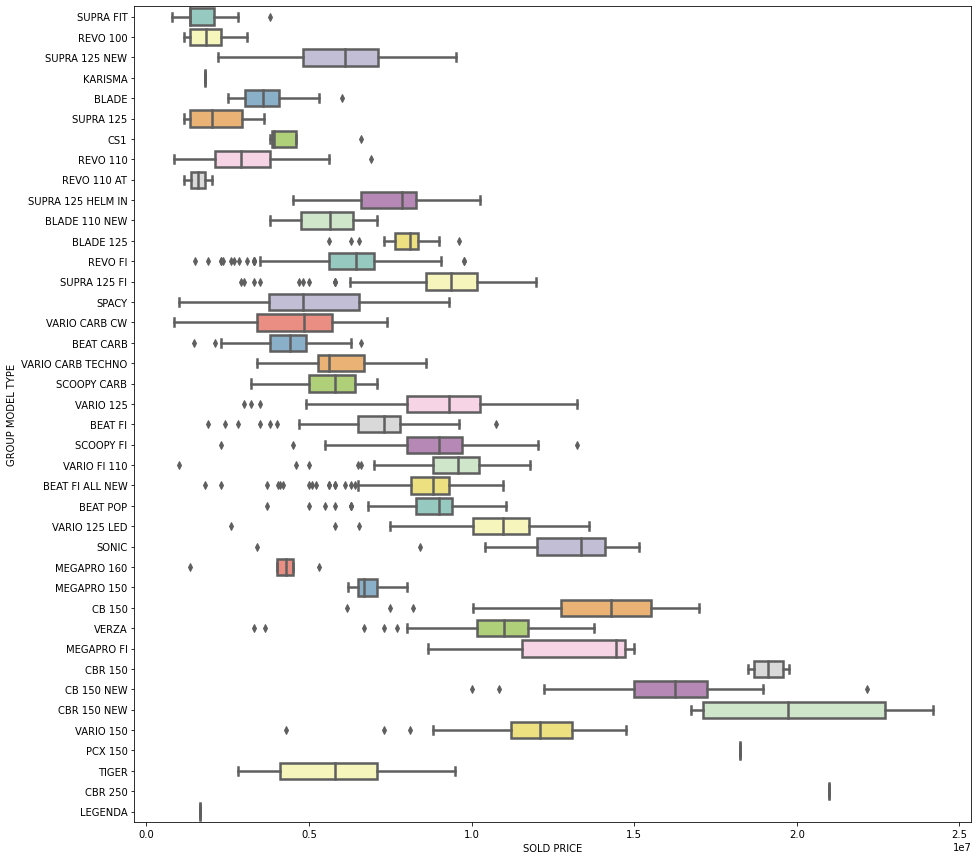

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(y="GROUP MODEL TYPE", x="SOLD PRICE", data=df, linewidth=2.5, palette="Set3")

dari boxplot diatas, terlihat juga type apa saja yang berada di segmen low, low-medium, medium-high, dan high.

##**YEAR vs SOLD PRICE**

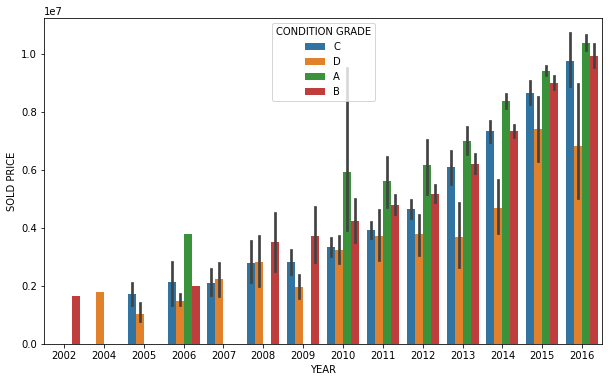

In [ ]:
sns.barplot(
    data = df,
    y="SOLD PRICE",
    x="YEAR",
    hue="CONDITION GRADE"    
    )

pada CONDITION GRADE 'D' cenderung tidak ada perbedaan yang signifikan di tahun 2011-2013. kemungkinan dikarenakan tingkat kerusakan yang tinggi, sehingga pembeli tidak memperhitungkan harga pasar, tetapi lebih banyak memperhitungkan harga spare part, dan biaya jasa perbaikan yang tinggi.

sedangkan di tahun 2010, atau usia kendaraan di tahun ke-5 & ke-6, perbedaan SOLD PRICE antara CONDITION GRADE 'C' & 'D' juga tidak signifikan. analisanya juga mirip dengan kasus di atas.

sebaliknya untuk usia kendaraan belum 1 tahun, CONDITION GRADE tidak terlalu mempengaruhi SOLD PRICE kecuali unit dengan CONDITION GRADE 'D'.

##**LOST PART vs SOLD PRICE**

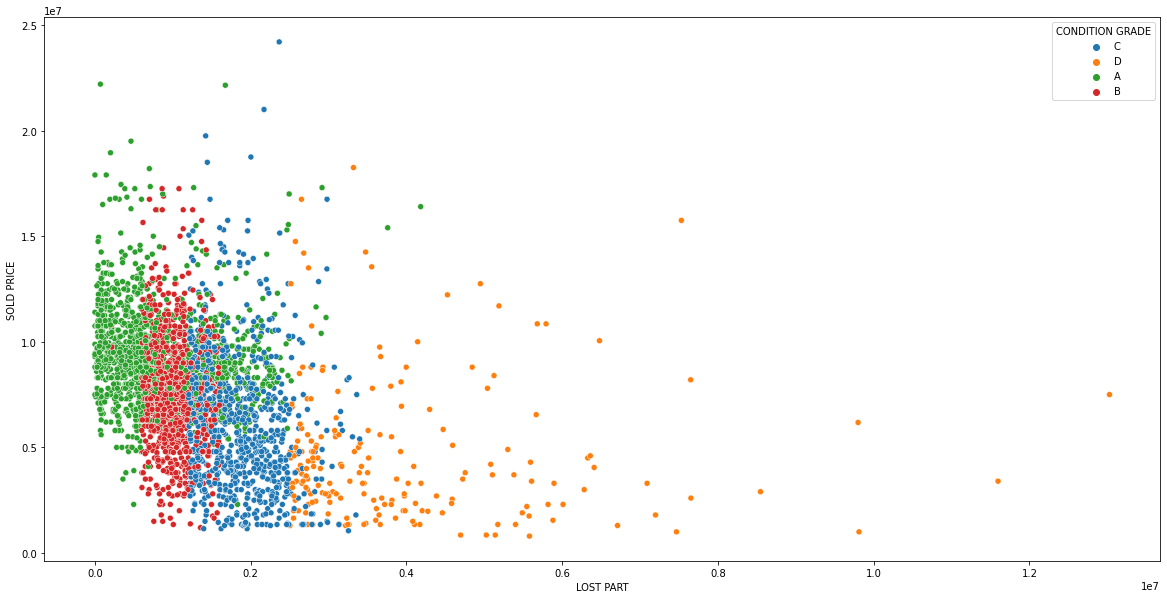

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data=df, x='LOST PART', y='SOLD PRICE', 
                hue='CONDITION GRADE')

pada scatterplot ini terlihat gambaran dari kondisi motor Grade A,B,C,D. 
Grade A cenderung memiliki LOST PART lebih rendah dan SOLD PRICE lebih tinggi.
sedangkan grade B cenderung memiliki LOST PART lebih tinggi dari grade A dan memiliki SOLD PRICE lebih rendah dari grade A.
dan seterusnya grade C dan D.

##**NEW PRICE vs SOLD PRICE**

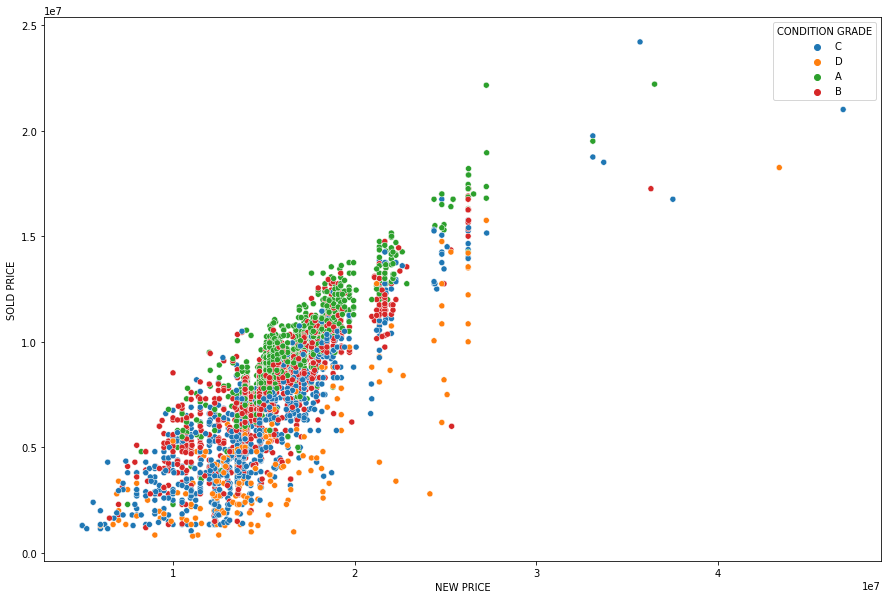

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='NEW PRICE', y='SOLD PRICE', 
                hue='CONDITION GRADE')

secara linier, semakin tinggi dari NEW PRICE semakin tinggi pula SOLD PRICE yang terbentuk sesuai dengan kondisi motor dengan grade A cenderung berada pada posisi SOLD PRICE lebih tinggi, grade B cenderung lebih rendah dari pada grade B dan seterusnya pada grade C & D.

##**SOLD PRICE MINIMUM vs SOLD PRICE**

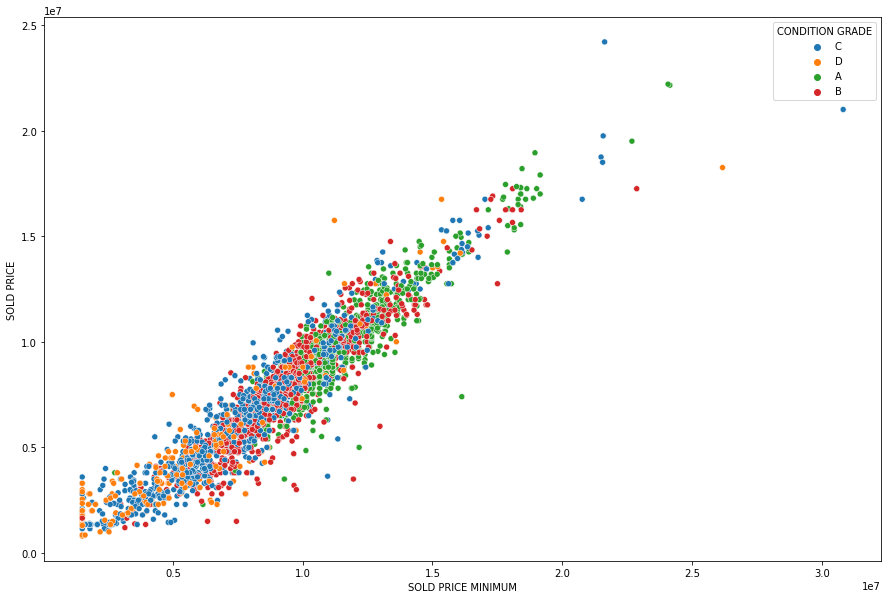

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='SOLD PRICE MINIMUM', y='SOLD PRICE', 
                hue='CONDITION GRADE')

senada dengan NEW PRICE, secara linier semakin tinggi dari SOLD PRICE MINIMUM, semakin tinggi pula harga SOLD PRICE yang terbentuk sesuai dengan kondisi motor.

##**MARKET PRICE vs SOLD PRICE**

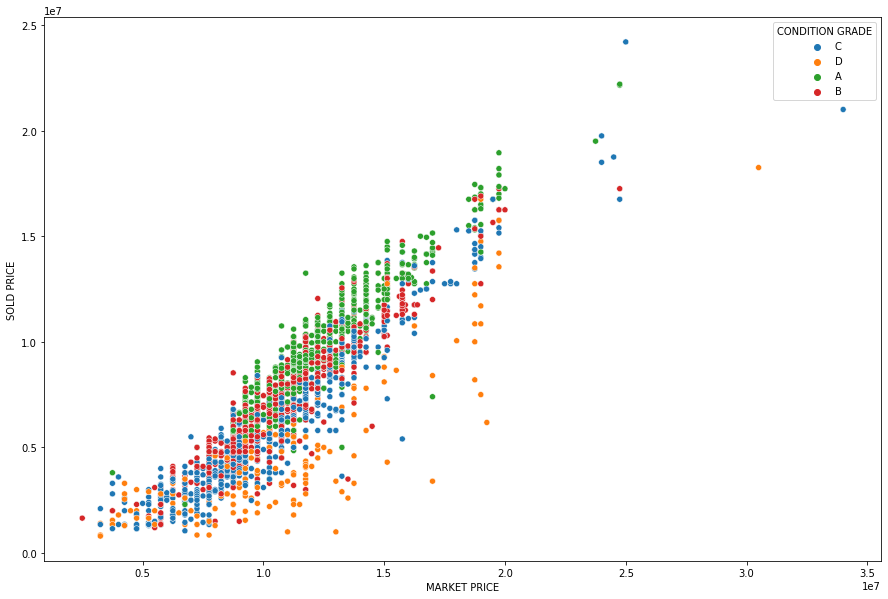

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='MARKET PRICE', y='SOLD PRICE', 
                hue='CONDITION GRADE')

fitur MARKET PRICE juga memiliki karakter yang sama terhadap fitur SOLD PRICE. secara linier, semakin tinggi MARKET PRICE semakin tinggi pula SOLD PRICE yang terbentuk sesuai dengan kondisi motor dengan grade A cenderung berada pada posisi SOLD PRICE lebih tinggi, grade B cenderung lebih rendah dari pada grade B dan seterusnya pada grade C & D.

#**Drop Unuseable fitur**

dibagian ini saya akan membuang fitur-fitur yang tidak terpakai dilihat dari busines understandingnya khususnya untuk memprediksi target fitur SOLD PRICE. sehingga didapat fitur-fitur dibawah ini akan saya drop sebelum dilakukan proses selanjutnya.

fitur yang akan di drop :
- BRAND MODEL TYPE
- CATEGORY
- MODEL
- TYPE
- CHASIS NUMBER
- CODE ENGINE
- SOLD PRICE MINIMUM

In [ ]:
df=df.drop(['BRAND MODEL TYPE','CATEGORY','MODEL','TYPE','CHASIS NUMBER','CODE ENGINE','SOLD PRICE MINIMUM'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   GROUP MODEL TYPE  3204 non-null   object
 1   YEAR              3204 non-null   int64 
 2   DOCUMENT          3204 non-null   object
 3   LOST PART         3204 non-null   int64 
 4   CONDITION GRADE   3204 non-null   object
 5   NEW PRICE         3204 non-null   int64 
 6   MARKET PRICE      3204 non-null   int64 
 7   SOLD PRICE        3204 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 200.4+ KB


In [ ]:
df.shape

(3204, 8)

setelah di drop fitur, sehingga bentuk dataset terakhir menjadi 3204 rows dan 8 kolom.

#**Encoding**

pada tahapan ini saya akan melakukan feature encoding pada semua data categorical yang tersisa.

##**Encoding fitur GROUP MODEL TYPE**

In [ ]:
freq_GMT = df['GROUP MODEL TYPE'].value_counts().reset_index()
freq_GMT.rename(columns={'index': 'GROUP MODEL TYPE', 'GROUP MODEL TYPE': 'GroupModelType_freq'}, inplace = True)

df = df.merge(freq_GMT[['GROUP MODEL TYPE','GroupModelType_freq']], on='GROUP MODEL TYPE', how='inner')

df = df.drop(['GROUP MODEL TYPE'], axis=1)

df.sample(5)

,YEAR,DOCUMENT,LOST PART,CONDITION GRADE,NEW PRICE,MARKET PRICE,SOLD PRICE,GroupModelType_freq
2300,2016,Y,2080125,C,15650000,11750000,7300000,344
2569,2016,Y,51500,A,15480000,11750000,8900000,227
1771,2014,N,1417500,B,14770000,10750000,6550000,289
2658,2015,Y,701500,A,18270000,13250000,10750000,204
409,2012,Y,867500,B,10750000,7750000,4300000,260


##**Encoding fitur DOCUMENT**

In [ ]:
df['DOCUMENT_cat'] = df['DOCUMENT'].astype('category').cat.codes

df = df.drop(['DOCUMENT'], axis=1)

df.sample(5)

,YEAR,LOST PART,CONDITION GRADE,NEW PRICE,MARKET PRICE,SOLD PRICE,GroupModelType_freq,DOCUMENT_cat
2323,2015,1166250,A,15570000,11250000,8331000,344,1
779,2016,624750,A,14090000,9750000,8600000,404,1
1873,2015,929500,A,17225000,11750000,8800000,98,1
1150,2011,1268250,B,11500000,7750000,3800000,88,0
366,2013,6710700,D,12860000,8000000,1300000,260,1


##**Encoding fitur CONDITION GRADE**

In [ ]:
map_GRADE = {'A':1,
                'B':2,
                'C':3,
                'D':4
                }
df['GRADE_cat'] = df['CONDITION GRADE'].map(map_GRADE)

df = df.drop(['CONDITION GRADE'], axis=1)

df.head()

,YEAR,LOST PART,NEW PRICE,MARKET PRICE,SOLD PRICE,GroupModelType_freq,DOCUMENT_cat,GRADE_cat
0,2005,2219200,9500000,3250000,2100000,18,0,3
1,2005,3479300,11568000,3250000,1400000,18,0,4
2,2005,4695402,11368000,3250000,850000,18,0,4
3,2005,5580300,11082500,3250000,800000,18,0,4
4,2007,2375375,6000000,4250000,2000000,18,1,3


#**Check Multicollinierity**

setelah merubah kolom kategorikal menjadi numerikal, dilanjutkan cek multicollinierity untuk melihat seberapa besar korelasi antar fitur, terlebih terhadap target fitur SOLD PRICE.

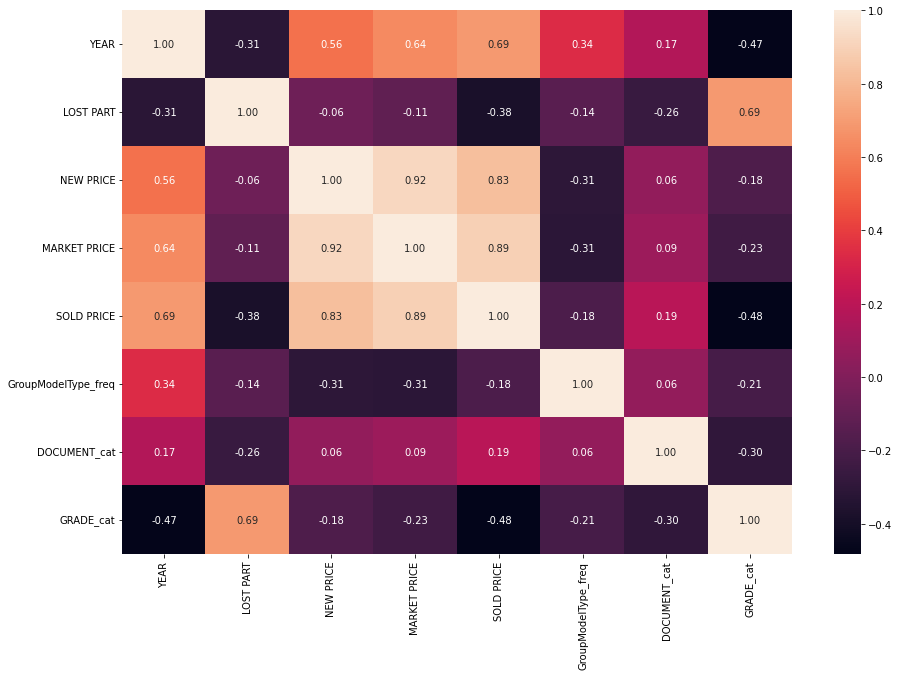

In [ ]:
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

karena fitur MARKET PRICE dengan NEW PRICE memiliki korelasi yang sangat tinggi (0,92) dan berdasarkan scatterplot sebelumnya di EDA, fitur MARKET PRICE dan NEW PRICE memiliki karakter yang mirip terhadap SOLD PRICE. sehingga saya putuskan drop fitur MARKET PRICE karena sudah di wakilkan oleh fitur NEW PRICE.

In [ ]:
#drop columns with high multicollinearity
df = df.drop(columns=['MARKET PRICE'])

#**Define X (features data) and Y (target data)**

mendefinisikan data fitur dan data target. dengan data target adalah fitur **SOLD PRICE**

In [ ]:
X = df.drop(['SOLD PRICE'],axis=1)
Y = df['SOLD PRICE'].values

#**Train Test Split**

melakukan split data menjadi train data dan test data. dengan komposisi 70-30

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size=0.30,random_state=42)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',X_train.shape,Y_train.shape,'\nValidation set   ---> ', X_valid.shape,'', Y_valid.shape)

Original set  --->  (3204, 6) (3204,) 
Training set  --->  (2242, 6) (2242,) 
Validation set   --->  (962, 6)  (962,)


#**Normalize training set**

karena ada beberapa fitur yang memiliki nilai sangat tinggi dan ada beberapa fitur yang memiliki nilai sangat kecil, maka supaya nilai-nilainya berada pada skala yang sama, maka untuk fitur-fitur yang memiliki nilai sangat tinggi akan saya 'normalisasi' menggunakan metode MinMaxScaler karena distribusi dataset tidak normal.

In [ ]:
df.head(3)

,YEAR,LOST PART,NEW PRICE,SOLD PRICE,GroupModelType_freq,DOCUMENT_cat,GRADE_cat
0,2005,2219200,9500000,2100000,18,0,3
1,2005,3479300,11568000,1400000,18,0,4
2,2005,4695402,11368000,850000,18,0,4


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['LOST PART', 'NEW PRICE', 'SOLD PRICE', 'YEAR']] = scaler.fit_transform(df[['LOST PART', 'NEW PRICE', 'SOLD PRICE', 'YEAR']])

df.head(3)

,YEAR,LOST PART,NEW PRICE,SOLD PRICE,GroupModelType_freq,DOCUMENT_cat,GRADE_cat
0,0.214286,0.170334,0.107347,0.055556,18,0,3
1,0.214286,0.267053,0.156679,0.025641,18,0,4
2,0.214286,0.360395,0.151908,0.002137,18,0,4


#**Model Training**

Untuk memprediksi harga jual motor bekas, saya menggunakan beberapa metode modelling untuk selanjutnya dipilih model yang terbaik. dan sebelumnya saya menggunakan model Linear Regression sebagai baseline model.

In [ ]:
models = []
models.append(("LinearRegressor",LinearRegression()))
models.append(("Lasso",Lasso()))
models.append(("Ridge",Ridge()))
models.append(("DecisionTree",DecisionTreeRegressor(criterion="mse")))
models.append(("RandomForestRegressor",RandomForestRegressor(criterion="mse")))
models.append(("GradientBoostingRegressor",GradientBoostingRegressor()))
models.append(("KNeighborsRegressor",KNeighborsRegressor()))

In [ ]:
names = []
score = []
rmse = []
mse = []
mae = []
r2 = []
timing = []

In [ ]:
for name,model in models:
    model = model
    beg = time.time()
    model.fit(X_train,Y_train)
    pred = model.predict(X_valid)
    end = time.time()
    print("Model = {}".format(name))
    print("Score = {}, RMSE = {}, MSE = {}, MAE = {}, R2 = {},Time = {}\n".format(round(model.score(X_valid,Y_valid),4),
                                                round(np.sqrt(mean_squared_error(pred,Y_valid)),4),
                                                round(mean_squared_error(pred,Y_valid),4),
                                                round(mean_absolute_error(pred,Y_valid),4),
                                                round(r2_score(Y_valid,pred),4),(end-beg)))
    names.append(name)
    score.append(round(model.score(X_valid,Y_valid),4))
    rmse.append(round(np.sqrt(mean_squared_error(pred,Y_valid)),4))
    mse.append(round(mean_squared_error(pred,Y_valid),4))
    mae.append(round(mean_absolute_error(pred,Y_valid),4))
    r2.append(round(r2_score(pred,Y_valid),4))
    timing.append(end-beg)

Model = LinearRegressor
Score = 0.8597, RMSE = 1263283.0032, MSE = 1595883946180.6426, MAE = 953759.9342, R2 = 0.8597,Time = 0.01693105697631836

Model = Lasso
Score = 0.8597, RMSE = 1263283.2497, MSE = 1595884568931.1138, MAE = 953760.1673, R2 = 0.8597,Time = 0.049144744873046875

Model = Ridge
Score = 0.8597, RMSE = 1263317.7206, MSE = 1595971663126.296, MAE = 953795.3491, R2 = 0.8597,Time = 0.012069225311279297

Model = DecisionTree
Score = 0.8175, RMSE = 1440954.6417, MSE = 2076350279303.5344, MAE = 1007127.5468, R2 = 0.8175,Time = 0.022430419921875

Model = RandomForestRegressor
Score = 0.8964, RMSE = 1085902.0016, MSE = 1179183157145.061, MAE = 762803.1695, R2 = 0.8964,Time = 1.2097463607788086

Model = GradientBoostingRegressor
Score = 0.9074, RMSE = 1026360.4307, MSE = 1053415733719.4476, MAE = 742779.3848, R2 = 0.9074,Time = 0.4006671905517578

Model = KNeighborsRegressor
Score = 0.8104, RMSE = 1468886.2903, MSE = 2157626933773.389, MAE = 1084260.1871, R2 = 0.8104,Time = 0.013

In [ ]:
df_store5 = pd.DataFrame()
df_store5["names"] = names
df_store5["Score"] = score
df_store5["time"] = timing
df_store5["rmse"] = rmse
df_store5["mse"] = mse
df_store5["mae"] = mae
df_store5["r2"] = r2

In [ ]:
df_store5 = df_store5.sort_values(by="Score",ascending=False)
fig = px.bar(df_store5,"names","Score",color="names",title="Accuracy Score")
fig.show()

In [ ]:
df_store5 = df_store5.sort_values(by="rmse",ascending=True)
fig = px.bar(df_store5,"names","rmse",color="names",title="RMSE")
fig.show()

In [ ]:
df_store5 = df_store5.sort_values(by="mse",ascending=True)
fig = px.bar(df_store5,"names","mse",color="names",title="MSE")
fig.show()

In [ ]:
df_store5 = df_store5.sort_values(by="mae",ascending=True)
fig = px.bar(df_store5,"names","mae",color="names",title="MAE")
fig.show()

In [ ]:
df_store5 = df_store5.sort_values(by="r2",ascending=False)
fig = px.bar(df_store5,"names","r2",color="names",title="R2 Score")
fig.show()

In [ ]:
df_store5 = df_store5.sort_values(by="time",ascending=True)
fig = px.bar(df_store5,"names","time",color="names",title="Time taken by each model")
fig.show()

**Gradient Boosting Regressor** menjadi model yang terbaik bila dilihat dari data Acuracy Score, RMSE, MSE, MAE dan R2 score walaupun dari segi waktu membutuhkan waktu yang lebih lama.

#**Hyperparameter**

karena model terbaik ada di Gradient Boosting Regressor, maka untuk Tuning hyperparameter saya juga gunakan model Gradient Boosting Regressor.

##**Tuning Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
from pydataset import data
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

initiated datasets repo at: /root/.pydataset/


In [ ]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[50,100,150,200],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,3,4,5],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [ ]:
search.fit(X,Y)
search.best_params_

search.best_score_

-3532665494823.1416

In [ ]:
GBR2=GradientBoostingRegressor(n_estimators=500,learning_rate=0.01,subsample=.5,max_depth=1,random_state=1)
score=np.mean(cross_val_score(GBR2,X,Y,scoring='neg_mean_squared_error',cv=5,n_jobs=1))
score

-4774431825652.186

In [ ]:

columns = [f"param_{name}" for name in search_grid.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_learning_rate,param_max_depth,param_subsample,param_random_state,mean_test_error,std_test_error
127,150,0.1,1,0.75,1,3.532665e+12,3.758685e+12
129,200,0.1,1,0.5,1,3.590436e+12,3.943859e+12
131,200,0.1,1,1,1,3.606852e+12,3.946843e+12
126,150,0.1,1,0.5,1,3.664266e+12,3.999142e+12
128,150,0.1,1,1,1,3.684928e+12,3.977966e+12
...,...,...,...,...,...,...,...
12,50,0.001,2,0.5,1,1.217810e+13,1.017241e+13
14,50,0.001,2,1,1,1.217944e+13,1.016263e+13
0,50,0.001,1,0.5,1,1.232809e+13,1.029352e+13
1,50,0.001,1,0.75,1,1.233013e+13,1.029488e+13


In [ ]:
error = -search.score(X_valid, Y_valid)
print(f"On average, our GBDT regressor makes an error of {error:.2f}")

On average, our GBDT regressor makes an error of 1160349826965.80


In [ ]:
search.fit(X_train, Y_train)
Y_predic = search.predict(X_valid)

method = str(type(search)).split('.')[-1][:-2]

# MAE score
mae = mean_absolute_error(Y_valid, Y_predic)
print('Mean Absolute Error : ',mae)

# MSE score
mse = mean_squared_error(Y_valid, Y_predic)
print('Mean Squared Error : ',mse)

#RMSE Score
rmse_value = np.sqrt(mean_squared_error(Y_valid, Y_predic))
print('Root Mean Squared Error : ',rmse_value)

#R2 Score
r2 = r2_score(Y_valid, Y_predic)
print('R2 Score : ',r2)

Mean Absolute Error :  709166.0635159286
Mean Squared Error :  956358955964.6399
Root Mean Squared Error :  977936.0694670383
R2 Score :  0.9159404231650905


#**Model Analysis**

In [ ]:
## initiate explainer for Gradient Boosting Regressor Model
sales_gbr_exp = dx.Explainer(search, X_train, Y_train, label = "Gradient Boosting Regressor Interpretation")

Preparation of a new explainer is initiated

  -> data              : 2242 rows 6 cols
  -> target variable   : 2242 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Gradient Boosting Regressor Interpretation
  -> predict function  : <function yhat_default at 0x7f9f9d2388c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 5.4e+05, mean = 7.8e+06, max = 2.2e+07
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.06e+06, mean = 2.18e+03, max = 3.62e+06
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
sales_st_gbr = sales_gbr_exp.model_parts()
sales_st_gbr.result

,variable,dropout_loss,label
0,_full_model_,7.704321e+05,Gradient Boosting Regressor Interpretation
1,DOCUMENT_cat,7.871011e+05,Gradient Boosting Regressor Interpretation
2,GRADE_cat,1.072111e+06,Gradient Boosting Regressor Interpretation
3,GroupModelType_freq,1.171603e+06,Gradient Boosting Regressor Interpretation
4,LOST PART,1.218400e+06,Gradient Boosting Regressor Interpretation
5,YEAR,1.657083e+06,Gradient Boosting Regressor Interpretation
6,NEW PRICE,2.476308e+06,Gradient Boosting Regressor Interpretation
7,_baseline_,4.186123e+06,Gradient Boosting Regressor Interpretation


In [ ]:
# visualize permutation feature importance for Gradient Boosting Regressor Model
sales_gbr_exp.model_parts().plot()

In [ ]:
# create partial dependence plot of Gradient Boosting Regressor model
sales_gbr_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 6/6 [00:00<00:00, 18.98it/s]


#**Insight**

Berdasarkan model Analysis, 
1. fitur NEW PRICE menjadi fitur yang paling berpengaruh terhadap prediksi SOLD PRICE.
2. fitur YEAR menjadi fitur berpengaruh kedua terhadap prediksi SOLD PRICE.
3. fitur LOST PART, GROUP MODEL TYPE, CONDITION GRADE masih berpengaruh terhadap prediksi SOLD PRICE tapi tidak terlalu signifikan jika dibandingkan dengan fitur NEW PRICE dan YEAR.
4. sedangkan fitur DOCUMENT sedikit sekali pengaruhnya terhadap fitur SOLD PRICE.
5. hasil tuning hyperparameter dengan model Gradient Boosting Regressor memiliki nilai Mean Average Error sebesar 709166.0635159286. yang artinya terdapat margin error sebesar +- 709.166,06 poin terhadap hasil prediksi. 
6. sedangkan nilai R2 Score sebesar 0.9159404231650905. yang artinya prediksi SOLD PRICE menggunakan model Gradient Boosting Regressor bisa diprediksi dengan akurasi hingga 91,59%.

#**Recomendations**

* untuk memprediksi SOLD PRICE motor bekas, stake holder wajib memperhatikan dan wajib memiliki referensi **Harga Baru** model dan tipe motor yang akan dijual.
* setelah itu, **Tahun Produksi** menjadi parameter kedua yang harus diperhatikan pada saat memprediksi SOLD PRICE motor bekas.
* sedangkan Kondisi motor dan model tipe motor hanya menjadi faktor pendukung untuk memprediksi SOLD PRICE.